In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score

In [2]:
# Reading the dataframe 
lead = pd.read_csv(r'C:\Users\tabish\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting the data

In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [6]:
# Replacing 'Select' with NaN values as select is also representing  null values
lead[["Specialization","City","How did you hear about X Education","Lead Profile"]] = lead[["Specialization","City","How did you hear about X Education","Lead Profile"]].replace("Select", np.NaN)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking for missing values

In [7]:
# Summing up the missing values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
round(100 * (lead.isnull().sum() / len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From the above missing value we will delete the columns "Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index","Asymmetrique Activity Index" and "Lead Quality" as these coulmns are having high missing values and they also dont have proper significance with the target column. Score and Index will be assigned to a customer once he/she is converted and even lead quality will also be judged once he/she starts the course so these columns do not hold any significance in deciding whether a customer will convert or not¶

In [9]:
lead = lead.drop(["Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index","Asymmetrique Activity Index","Lead Quality"],axis=1)

In [10]:
# Dropping the columns Prospect ID and Lead Number as these cells are of no use to predict model
lead = lead.drop(['Prospect ID', 'Lead Number'], axis  = 1)
lead.shape

(9240, 30)

In [11]:
# Lets remove the rows having NaN values for the low percentge missing values
lead = lead.dropna(subset = ['Lead Source'])
lead = lead.dropna(subset = ['TotalVisits'])
lead = lead.dropna(subset = ['Page Views Per Visit'])
lead = lead.dropna(subset = ['Last Activity'])
lead.shape
lead

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,No,No,NaN,No,No,NaN,NaN,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,No,No,NaN,No,No,NaN,NaN,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,...,No,No,NaN,No,No,NaN,Thane & Outskirts,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,...,No,No,NaN,No,No,NaN,Mumbai,No,No,Email Opened


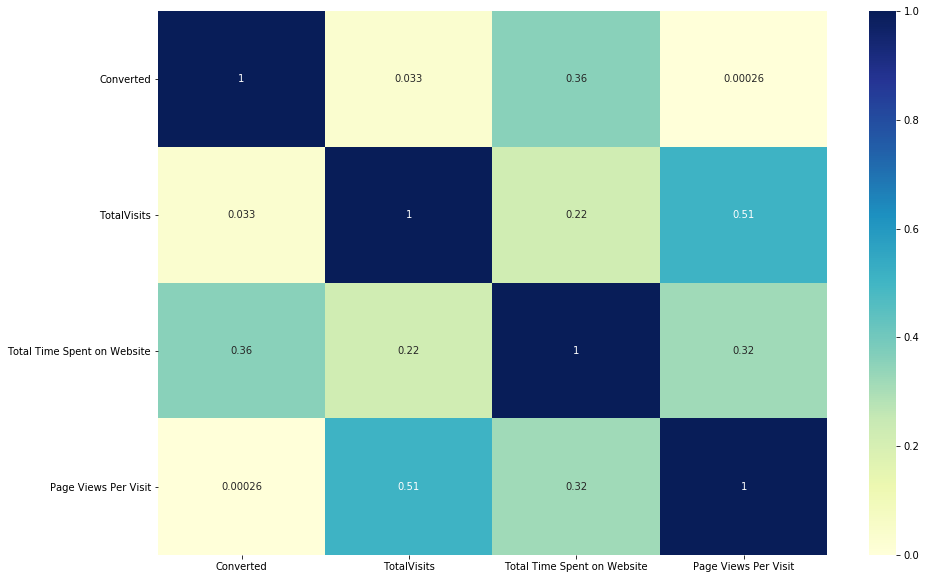

In [12]:
# figure size
plt.figure(figsize=(15,10))
# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu",annot=True)
plt.show()

#### Country 

In [13]:
lead.groupby(['Country','Converted']).size().reset_index().rename({0:'Count'},axis=1).sort_values('Count',ascending=False).head(10)

,Country,Converted,Count
19,India,0,4091
20,India,1,2400
52,United States,0,51
48,United Arab Emirates,0,33
49,United Arab Emirates,1,20
53,United States,1,18
36,Saudi Arabia,0,17
38,Singapore,0,13
39,Singapore,1,11
2,Australia,0,10


##### We can see that most of the leads are from country India, So imputing missing values with 'India'

In [14]:
# Let's impute the missing occupation as Other
lead['Country'] = lead['Country'].fillna('India')
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


In [15]:
lead['Country'].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
China                      2
Belgium                    2
Bangladesh                 2
Philippines                2
Italy                      2
Netherlands                2
Uganda                     2
Ghana                      2
Liberia                    1
Kenya                      1
Tanzania                   1
Vietnam                    1
Denmark                    1
Indonesia                  1
Switzerland   

#### Specialiation

In [16]:
# let's look value count of each variable in the column
lead['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
# Finance management is repeating maximum times, imputing the missing values with this
lead['Specialization'] = lead['Specialization'].fillna('Finance Management')
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


In [18]:
# Checking the column variables after imputing
lead['Specialization'].value_counts()

Finance Management                   4241
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### How did you hear about X Education

In [19]:
# Checking the column variables before imputing
lead['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            347
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              66
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [20]:
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].fillna('Online Search ')
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


In [21]:
lead['How did you hear about X Education'].value_counts()

Online Search            7086
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### What is your current occupation

In [22]:
lead['What is your current occupation'].value_counts()

lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Unemployed')
lead.head()

lead['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

#### What matters most to you in choosing a course

In [23]:
lead['What matters most to you in choosing a course'].value_counts()

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('Better Career Prospects')
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

#### Tags

In [24]:
lead['Tags'].value_counts()

lead['Tags'] = lead['Tags'].fillna('Will revert after reading the email')
lead['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

#### Lead Quality¶

In [25]:
lead['Lead Profile'].value_counts()

lead['Lead Profile'] = lead['Lead Profile'].fillna('Potential Lead')
lead['Lead Profile'].value_counts()

Potential Lead                 8311
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### City

In [26]:
lead['City'].value_counts()

lead['City'] = lead['City'].fillna('Mumbai')
lead['City'].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

# EDA

### Checking for outliers 

In [28]:
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


##### It can be seen from the above table that outliers exists for columns TotalVisits and Page Views Per Visit since there is a huge change between 99 percentile and maximum value.

### Outlier Treatment 

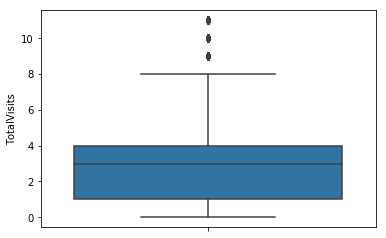

In [29]:
#Outlier removal
Q1 = lead.TotalVisits.quantile(0.25)
Q3 = lead.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
lead = lead[(lead.TotalVisits >= Q1 - 1.5*IQR) & (lead.TotalVisits <= Q3 + 1.5*IQR)]
sns.boxplot(y=lead['TotalVisits'])

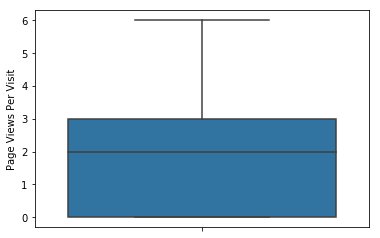

In [30]:
Q1 = lead['Page Views Per Visit'].quantile(0.25)
Q3 = lead['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
sns.boxplot(y=lead['Page Views Per Visit'])

In [31]:
lead.shape

(8513, 30)

# Data Preparation

In [32]:
# List of variables to map

varlist =  ["Do Not Call","Do Not Email","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]


# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [33]:
lead.shape

(8513, 30)

### Creating The Dummy Value

In [34]:
dummy1=pd.get_dummies(lead[["Lead Origin","Lead Source","Last Activity","Country","Specialization","How did you hear about X Education","What is your current occupation","What matters most to you in choosing a course","Tags","Lead Profile","City","Last Notable Activity"]],drop_first=True)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,Interested in other courses,0,0,Potential Lead,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,Ringing,0,0,Potential Lead,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,Ringing,0,0,Potential Lead,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,0,Modified


In [35]:
dummy1.shape

(8513, 158)

In [36]:
lead=pd.concat([dummy1,lead],axis=1)
lead.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,0,0,0,0,0,0,0,1,0,...,0,0,Interested in other courses,0,0,Potential Lead,Mumbai,0,0,Modified
1,0,0,0,0,0,0,0,0,0,1,...,0,0,Ringing,0,0,Potential Lead,Mumbai,0,0,Email Opened
2,1,0,0,1,0,0,0,0,0,0,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,1,0,0,1,0,0,0,0,0,0,...,0,0,Ringing,0,0,Potential Lead,Mumbai,0,0,Modified
4,1,0,0,0,0,1,0,0,0,0,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,0,Modified


In [37]:
# Dropping original columns from dataframe of which dummy variables is created
lead=lead.drop(["Lead Origin","Lead Source","Last Activity","Country","Specialization","How did you hear about X Education","What is your current occupation","What matters most to you in choosing a course","Tags","Lead Profile","City","Last Notable Activity"],1)
lead.shape

(8513, 176)

#### Correlation of variables

In [38]:
lead.corr()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
Lead Origin_Landing Page Submission,1.000000,-0.282062,-0.061215,0.545121,-0.058297,0.090813,-0.016050,0.010352,-0.531845,0.030044,...,NaN,NaN,0.010352,0.014641,0.009855,NaN,NaN,NaN,NaN,0.565050
Lead Origin_Lead Add Form,-0.282062,1.000000,-0.015750,-0.167230,-0.016020,-0.184190,0.056904,-0.002920,-0.134522,-0.094740,...,NaN,NaN,-0.002920,-0.004130,-0.005841,NaN,NaN,NaN,NaN,-0.160852
Lead Origin_Lead Import,-0.061215,-0.015750,1.000000,-0.036293,0.983134,-0.040192,-0.000896,-0.000634,-0.029698,-0.020561,...,NaN,NaN,-0.000634,-0.000896,-0.001268,NaN,NaN,NaN,NaN,-0.038447
Lead Source_Direct Traffic,0.545121,-0.167230,-0.036293,1.000000,-0.036916,-0.426745,-0.009516,-0.006728,-0.315322,-0.218313,...,NaN,NaN,0.017460,0.024694,0.022830,NaN,NaN,NaN,NaN,0.632774
Lead Source_Facebook,-0.058297,-0.016020,0.983134,-0.036916,1.000000,-0.040881,-0.000912,-0.000645,-0.030207,-0.020914,...,NaN,NaN,-0.000645,-0.000912,-0.001289,NaN,NaN,NaN,NaN,-0.039107
Lead Source_Google,0.090813,-0.184190,-0.040192,-0.426745,-0.040881,1.000000,-0.010538,-0.007451,-0.349191,-0.241762,...,NaN,NaN,-0.007451,-0.010538,-0.014905,NaN,NaN,NaN,NaN,-0.322164
Lead Source_Live Chat,-0.016050,0.056904,-0.000896,-0.009516,-0.000912,-0.010538,1.000000,-0.000166,-0.007787,-0.005391,...,NaN,NaN,-0.000166,-0.000235,-0.000332,NaN,NaN,NaN,NaN,-0.010081
Lead Source_NC_EDM,0.010352,-0.002920,-0.000634,-0.006728,-0.000645,-0.007451,-0.000166,1.000000,-0.005506,-0.003812,...,NaN,NaN,-0.000117,-0.000166,-0.000235,NaN,NaN,NaN,NaN,-0.007128
Lead Source_Olark Chat,-0.531845,-0.134522,-0.029698,-0.315322,-0.030207,-0.349191,-0.007787,-0.005506,1.000000,-0.178638,...,NaN,NaN,-0.005506,-0.007787,0.002411,NaN,NaN,NaN,NaN,-0.300445
Lead Source_Organic Search,0.030044,-0.094740,-0.020561,-0.218313,-0.020914,-0.241762,-0.005391,-0.003812,-0.178638,1.000000,...,NaN,NaN,-0.003812,-0.005391,-0.007625,NaN,NaN,NaN,NaN,0.112929


# Model Building

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)
X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Putting response variable to y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
5123,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6322,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3644,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3011,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8140,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Running Your First Training Model

In [45]:
import statsmodels.api as sm

In [46]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5805
Model Family:                Binomial   Df Model:                          153
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 03 Jan 2020   Deviance:                          nan
Time:                        06:41:44   Pearson chi2:                 3.82e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.145e+16   1.14e+08      1e+08      0.000    1.15e+16    1.15e+16
Lead Origin_Landing Page Submission                                     -1.306e+14   4.04e+06  -3.23e+07      0.000   -1.31e+14   -1.31e+14
Lead Origin_Lead Add Form                                                -2.41e+15   4.86e+07  -4.96e+07      0.000   -2.41e+15   -2.41e+15
Lead Origin_Lead Import                                                  6.133e+15   7.25e+07   8.46e+07      0.000    6.13e+15    6.13e+15
Lead Source_Direct Traffic                                              -4.394e+15   6.46e+07   -6.8e+07      0.000   -4.39e+15   -4.39e+15
Lead Source_Facebook                                                    -1.021e+16   9.58e+07  -1.07e+08      0.000   -1.02e+16   -1.02e+16
Lead Source_Google                                                       -4.39e+15   6.46e+07   -6.8e+07      0.000   -4.39e+15   -4.39e+15
Lead Source_Live Chat                                                    1.841e+15   7.95e+07   2.31e+07      0.000    1.84e+15    1.84e+15
Lead Source_NC_EDM                                                       2.844e+14   9.37e+07   3.04e+06      0.000    2.84e+14    2.84e+14
Lead Source_Olark Chat                                                  -3.846e+15   6.46e+07  -5.95e+07      0.000   -3.85e+15   -3.85e+15
Lead Source_Organic Search                                              -4.456e+15   6.46e+07   -6.9e+07      0.000   -4.46e+15   -4.46e+15
Lead Source_Pay per Click Ads                                           -7.409e+15   9.34e+07  -7.94e+07      0.000   -7.41e+15   -7.41e+15
Lead Source_Press_Release                                                  39.9943    1.2e-06   3.32e+07      0.000      39.994      39.994
Lead Source_Reference                                                   -1.567e+15   4.28e+07  -3.66e+07      0.000   -1.57e+15   -1.57e+15
Lead Source_Referral Sites                                               -4.61e+15   6.51e+07  -7.08e+07      0.000   -4.61e+15   -4.61e+15
Lead Source_Social Media                                                 8.647e+14   9.34e+07   9.26e+06      0.000    8.65e+14    8.65e+14
Lead Source_WeLearn                                                     -9.728e+13   9.34e+07  -1.04e+06      0.000   -9.73e+13   -9.73e+13
Lead Source_Welingak Website                                            -1.272e+15   4.32e+07  -2.95e+07      0.000   -1.27e+15   -1.27e+15
Lead Source_bing                                                        -4.465e+15   7.28e+07  -6.13e+07      0.000   -4.47e+15   -4.47e+15
Lead Source_blog                                                        -8.931e+15

### Feature Selection Using RFE

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 40)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 71),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 96),
 ('Lead Source_NC_EDM', False, 55),
 ('Lead Source_Olark Chat', False, 68),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 108),
 ('Lead Source_Press_Release', False, 116),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_WeLearn', False, 75),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 104),
 ('Lead Source_blog', False, 13),
 ('Lead Source_google', False, 40),
 ('Lead Source_testone', False, 91),
 ('Lead Source_welearnblog_Home', False, 29),
 ('Lead Source_youtubechannel', False, 119),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_E

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Hong Kong', 'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Lost to Others',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5918
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 03 Jan 2020   Deviance:                          nan
Time:                        06:41:51   Pearson chi2:                 1.22e+04
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6062      0.516      1.176      0.240      -0.404       1.617
Lead Origin_Lead Add Form                                2.7056      0.324      8.358      0.000       2.071       3.340
Lead Source_Direct Traffic                              -1.0464      0.149     -7.006      0.000      -1.339      -0.754
Lead Source_Google                                      -0.8220      0.139     -5.934      0.000      -1.094      -0.550
Lead Source_Organic Search                              -0.8919      0.186     -4.801      0.000      -1.256      -0.528
Lead Source_Welingak Website                             1.8385      1.067      1.723      0.085      -0.253       3.930
Last Activity_Converted to Lead                         -0.8650      0.309     -2.801      0.005      -1.470      -0.260
Last Activity_Had a Phone Conversation                   5.1231      4.199      1.220      0.222      -3.108      13.354
Last Activity_Olark Chat Conversation                   -1.3237      0.211     -6.272      0.000      -1.737      -0.910
Last Activity_SMS Sent                                   0.8677      0.204      4.253      0.000       0.468       1.268
Country_Hong Kong                                        5.0861      1.727      2.946      0.003       1.702       8.470
How did you hear about X Education_Email                 2.0236      0.844      2.397      0.017       0.369       3.678
How did you hear about X Education_SMS                  -1.6479      0.820     -2.011      0.044      -3.254      -0.042
What is your current occupation_Unemployed              -1.3625      0.369     -3.697      0.000      -2.085      -0.640
What is your current occupation_Working Professional     1.7706      0.463      3.827      0.000       0.864       2.677
Tags_Busy                                                2.4425      0.424      5.757      0.000       1.611       3.274
Tags_Closed by Horizzon                                  8.7754      1.080      8.124      0.000       6.658      10.893
Tags_Diploma holder (Not Eligible)                     -37.5358    1.1e+07   -3.4e-06      1.000   -2.16e+07    2.16e+07
Tags_Interested  in full time MBA                       -1.8980      0.932     -2.037      0.042      -3.724      -0.072
Tags_Interested in other courses                        -0.9669      0.545     -1.775      0.076      -2.035       0.101
Tags_Lateral student                                    41.6421   6.71e+07   6.21e-07      1.000   -1.32e+08    1.32e+08
Tags_Lost to EINS                                        8.4631      0.817     10.354      0.000       6.861      10.065
Tags_Lost to Others                                    -42.5574   2.74e+07  -1.55e-06      1.000   -5.37e+07    5.37e+07
Tags_Not doing f

In [52]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5123    0.153909
6322    0.000745
3644    0.000641
3011    0.001002
8140    0.000299
1339    0.943363
211     0.789908
661     0.774545
2120    0.153909
475     0.999161
dtype: float64

In [53]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.53909469e-01, 7.45103150e-04, 6.41269271e-04, 1.00185541e-03,
       2.98805527e-04, 9.43363275e-01, 7.89907690e-01, 7.74545090e-01,
       1.53909469e-01, 9.99160676e-01])

In [54]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.153909,5123
1,0,0.000745,6322
2,0,0.000641,3644
3,0,0.001002,3011
4,0,0.000299,8140


In [55]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.153909,5123,0
1,0,0.000745,6322,0
2,0,0.000641,3644,0
3,0,0.001002,3011,0
4,0,0.000299,8140,0


In [56]:
from sklearn import metrics

In [57]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.900990099009901


##### Dropping Lead Profile_Lateral Student due to high P vlaue

In [58]:
col = col.drop('Lead Profile_Lateral Student', 1)

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5919
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1517.6
Date:                Fri, 03 Jan 2020   Deviance:                       3035.3
Time:                        06:41:52   Pearson chi2:                 1.23e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7269      0.508      1.431      0.153      -0.269       1.723
Lead Origin_Lead Add Form                                2.7079      0.323      8.374      0.000       2.074       3.342
Lead Source_Direct Traffic                              -1.0465      0.149     -7.011      0.000      -1.339      -0.754
Lead Source_Google                                      -0.8144      0.138     -5.886      0.000      -1.086      -0.543
Lead Source_Organic Search                              -0.8923      0.186     -4.806      0.000      -1.256      -0.528
Lead Source_Welingak Website                             1.8393      1.067      1.724      0.085      -0.252       3.930
Last Activity_Converted to Lead                         -0.8670      0.309     -2.808      0.005      -1.472      -0.262
Last Activity_Had a Phone Conversation                   5.1199      4.195      1.221      0.222      -3.102      13.342
Last Activity_Olark Chat Conversation                   -1.3258      0.211     -6.282      0.000      -1.739      -0.912
Last Activity_SMS Sent                                   0.8671      0.204      4.250      0.000       0.467       1.267
Country_Hong Kong                                        5.0840      1.725      2.947      0.003       1.703       8.465
How did you hear about X Education_Email                 2.0082      0.842      2.385      0.017       0.358       3.658
How did you hear about X Education_SMS                  -1.6508      0.819     -2.014      0.044      -3.257      -0.045
What is your current occupation_Unemployed              -1.3422      0.367     -3.657      0.000      -2.062      -0.623
What is your current occupation_Working Professional     1.7867      0.461      3.873      0.000       0.883       2.691
Tags_Busy                                                2.3487      0.416      5.651      0.000       1.534       3.163
Tags_Closed by Horizzon                                  8.6902      1.077      8.071      0.000       6.580      10.801
Tags_Diploma holder (Not Eligible)                     -22.6309   3.02e+04     -0.001      0.999   -5.92e+04    5.91e+04
Tags_Interested  in full time MBA                       -2.0271      0.927     -2.186      0.029      -3.844      -0.210
Tags_Interested in other courses                        -1.0710      0.538     -1.992      0.046      -2.125      -0.017
Tags_Lateral student                                    29.5567   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Tags_Lost to EINS                                        8.3867      0.814     10.299      0.000       6.791       9.983
Tags_Lost to Others                                    -27.4075   6.48e+04     -0.000      1.000   -1.27e+05    1.27e+05
Tags_Not doing f

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,23.48
30,Lead Profile_Potential Lead,15.80
24,Tags_Will revert after reading the email,11.71
34,Last Notable Activity_SMS Sent,6.77
8,Last Activity_SMS Sent,6.67
23,Tags_Ringing,3.34
33,Last Notable Activity_Modified,3.19
2,Lead Source_Google,3.17
13,What is your current occupation_Working Profes...,2.97
1,Lead Source_Direct Traffic,2.92


 #####  Dropping Tags_Lost to Others due to high P-Value

In [62]:
col = col.drop('Tags_Lost to Others', 1)

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5920
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1522.2
Date:                Fri, 03 Jan 2020   Deviance:                       3044.3
Time:                        06:41:54   Pearson chi2:                 1.20e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5435      0.510      1.067      0.286      -0.455       1.542
Lead Origin_Lead Add Form                                2.6231      0.317      8.284      0.000       2.002       3.244
Lead Source_Direct Traffic                              -1.0346      0.149     -6.946      0.000      -1.327      -0.743
Lead Source_Google                                      -0.8085      0.138     -5.852      0.000      -1.079      -0.538
Lead Source_Organic Search                              -0.8804      0.185     -4.750      0.000      -1.244      -0.517
Lead Source_Welingak Website                             1.9281      1.065      1.810      0.070      -0.159       4.016
Last Activity_Converted to Lead                         -0.8569      0.307     -2.792      0.005      -1.458      -0.255
Last Activity_Had a Phone Conversation                   5.1112      4.183      1.222      0.222      -3.087      13.310
Last Activity_Olark Chat Conversation                   -1.3194      0.211     -6.266      0.000      -1.732      -0.907
Last Activity_SMS Sent                                   0.8446      0.204      4.145      0.000       0.445       1.244
Country_Hong Kong                                        5.0718      1.718      2.952      0.003       1.705       8.439
How did you hear about X Education_Email                 2.0080      0.844      2.379      0.017       0.354       3.662
How did you hear about X Education_SMS                  -1.6482      0.817     -2.017      0.044      -3.250      -0.046
What is your current occupation_Unemployed              -1.3691      0.368     -3.717      0.000      -2.091      -0.647
What is your current occupation_Working Professional     1.6615      0.457      3.635      0.000       0.766       2.557
Tags_Busy                                                2.4857      0.422      5.894      0.000       1.659       3.312
Tags_Closed by Horizzon                                  8.8215      1.079      8.174      0.000       6.706      10.937
Tags_Diploma holder (Not Eligible)                     -22.4478   3.03e+04     -0.001      0.999   -5.94e+04    5.93e+04
Tags_Interested  in full time MBA                       -1.8137      0.924     -1.963      0.050      -3.625      -0.003
Tags_Interested in other courses                        -0.8940      0.541     -1.653      0.098      -1.954       0.166
Tags_Lateral student                                    29.7125   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Tags_Lost to EINS                                        8.5003      0.816     10.416      0.000       6.901      10.100
Tags_Not doing further education                       -22.7095   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Tags_Ringing    

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,23.12
29,Lead Profile_Potential Lead,15.73
23,Tags_Will revert after reading the email,11.60
33,Last Notable Activity_SMS Sent,6.77
8,Last Activity_SMS Sent,6.67
22,Tags_Ringing,3.31
32,Last Notable Activity_Modified,3.19
2,Lead Source_Google,3.17
13,What is your current occupation_Working Profes...,2.92
1,Lead Source_Direct Traffic,2.92


##### Dropping Tags_Lateral student as P-Value >0.05

In [65]:
col = col.drop('Tags_Lateral student', 1)

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5921
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1526.2
Date:                Fri, 03 Jan 2020   Deviance:                       3052.5
Time:                        06:41:56   Pearson chi2:                 1.20e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6312      0.502      1.257      0.209      -0.353       1.616
Lead Origin_Lead Add Form                                2.6098      0.316      8.253      0.000       1.990       3.230
Lead Source_Direct Traffic                              -1.0447      0.149     -7.023      0.000      -1.336      -0.753
Lead Source_Google                                      -0.8164      0.138     -5.917      0.000      -1.087      -0.546
Lead Source_Organic Search                              -0.8901      0.185     -4.809      0.000      -1.253      -0.527
Lead Source_Welingak Website                             1.9306      1.065      1.813      0.070      -0.156       4.018
Last Activity_Converted to Lead                         -0.8538      0.306     -2.787      0.005      -1.454      -0.253
Last Activity_Had a Phone Conversation                   5.1109      4.175      1.224      0.221      -3.072      13.294
Last Activity_Olark Chat Conversation                   -1.3244      0.210     -6.295      0.000      -1.737      -0.912
Last Activity_SMS Sent                                   0.8691      0.203      4.275      0.000       0.471       1.268
Country_Hong Kong                                        5.0552      1.723      2.934      0.003       1.678       8.433
How did you hear about X Education_Email                 2.0130      0.844      2.384      0.017       0.358       3.668
How did you hear about X Education_SMS                  -1.6480      0.817     -2.018      0.044      -3.248      -0.048
What is your current occupation_Unemployed              -1.3527      0.366     -3.695      0.000      -2.070      -0.635
What is your current occupation_Working Professional     1.6704      0.455      3.675      0.000       0.779       2.561
Tags_Busy                                                2.3660      0.413      5.735      0.000       1.557       3.175
Tags_Closed by Horizzon                                  8.6988      1.075      8.089      0.000       6.591      10.807
Tags_Diploma holder (Not Eligible)                     -22.5607   3.03e+04     -0.001      0.999   -5.94e+04    5.93e+04
Tags_Interested  in full time MBA                       -1.9102      0.919     -2.079      0.038      -3.711      -0.109
Tags_Interested in other courses                        -1.0058      0.534     -1.883      0.060      -2.053       0.041
Tags_Lost to EINS                                        8.3877      0.813     10.318      0.000       6.794       9.981
Tags_Not doing further education                       -22.8059   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Tags_Ringing                                            -1.6714      0.429     -3.899      0.000      -2.512      -0.831
Tags_Will revert

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,23.09
28,Lead Profile_Potential Lead,15.73
22,Tags_Will revert after reading the email,11.57
32,Last Notable Activity_SMS Sent,6.76
8,Last Activity_SMS Sent,6.66
21,Tags_Ringing,3.31
31,Last Notable Activity_Modified,3.19
2,Lead Source_Google,3.17
1,Lead Source_Direct Traffic,2.92
13,What is your current occupation_Working Profes...,2.92


##### Dropping Tags_wrong number given as klow vaklue of p value

In [68]:
col = col.drop('Tags_wrong number given',1)

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5922
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1527.6
Date:                Fri, 03 Jan 2020   Deviance:                       3055.3
Time:                        06:41:57   Pearson chi2:                 1.21e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5289      0.504      1.050      0.294      -0.458       1.516
Lead Origin_Lead Add Form                                2.6128      0.317      8.253      0.000       1.992       3.233
Lead Source_Direct Traffic                              -1.0474      0.149     -7.043      0.000      -1.339      -0.756
Lead Source_Google                                      -0.8191      0.138     -5.936      0.000      -1.090      -0.549
Lead Source_Organic Search                              -0.8903      0.185     -4.810      0.000      -1.253      -0.528
Lead Source_Welingak Website                             1.9277      1.065      1.810      0.070      -0.160       4.015
Last Activity_Converted to Lead                         -0.8533      0.307     -2.781      0.005      -1.455      -0.252
Last Activity_Had a Phone Conversation                   5.1128      4.180      1.223      0.221      -3.080      13.306
Last Activity_Olark Chat Conversation                   -1.3242      0.210     -6.292      0.000      -1.737      -0.912
Last Activity_SMS Sent                                   0.8712      0.203      4.283      0.000       0.473       1.270
Country_Hong Kong                                        5.0532      1.723      2.932      0.003       1.675       8.431
How did you hear about X Education_Email                 2.0109      0.844      2.384      0.017       0.358       3.664
How did you hear about X Education_SMS                  -1.6454      0.817     -2.015      0.044      -3.246      -0.045
What is your current occupation_Unemployed              -1.3759      0.368     -3.736      0.000      -2.098      -0.654
What is your current occupation_Working Professional     1.6574      0.457      3.624      0.000       0.761       2.554
Tags_Busy                                                2.5129      0.406      6.192      0.000       1.718       3.308
Tags_Closed by Horizzon                                  8.8437      1.073      8.240      0.000       6.740      10.947
Tags_Diploma holder (Not Eligible)                     -22.4234   3.03e+04     -0.001      0.999   -5.94e+04    5.93e+04
Tags_Interested  in full time MBA                       -1.7867      0.919     -1.943      0.052      -3.589       0.015
Tags_Interested in other courses                        -0.8685      0.530     -1.638      0.101      -1.907       0.170
Tags_Lost to EINS                                        8.5190      0.809     10.525      0.000       6.933      10.105
Tags_Not doing further education                       -22.6767   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Tags_Ringing                                            -1.5230      0.421     -3.614      0.000      -2.349      -0.697
Tags_Will revert

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,22.59
27,Lead Profile_Potential Lead,15.68
22,Tags_Will revert after reading the email,10.87
31,Last Notable Activity_SMS Sent,6.76
8,Last Activity_SMS Sent,6.66
30,Last Notable Activity_Modified,3.19
2,Lead Source_Google,3.17
21,Tags_Ringing,3.15
1,Lead Source_Direct Traffic,2.91
13,What is your current occupation_Working Profes...,2.88


##### Dropping Tags_Not doing further education due to low value of P-Value

In [71]:
col = col.drop('Tags_Not doing further education', 1)

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5923
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1532.1
Date:                Fri, 03 Jan 2020   Deviance:                       3064.3
Time:                        06:41:58   Pearson chi2:                 1.20e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1013      0.488      0.208      0.835      -0.854       1.057
Lead Origin_Lead Add Form                                2.6185      0.317      8.268      0.000       1.998       3.239
Lead Source_Direct Traffic                              -1.0411      0.149     -7.003      0.000      -1.332      -0.750
Lead Source_Google                                      -0.8164      0.138     -5.918      0.000      -1.087      -0.546
Lead Source_Organic Search                              -0.8764      0.185     -4.746      0.000      -1.238      -0.514
Lead Source_Welingak Website                             1.9227      1.065      1.805      0.071      -0.165       4.011
Last Activity_Converted to Lead                         -0.8488      0.306     -2.773      0.006      -1.449      -0.249
Last Activity_Had a Phone Conversation                   5.1224      4.199      1.220      0.222      -3.107      13.352
Last Activity_Olark Chat Conversation                   -1.3135      0.210     -6.249      0.000      -1.725      -0.902
Last Activity_SMS Sent                                   0.8802      0.203      4.335      0.000       0.482       1.278
Country_Hong Kong                                        5.0486      1.722      2.933      0.003       1.674       8.423
How did you hear about X Education_Email                 2.0286      0.849      2.390      0.017       0.365       3.692
How did you hear about X Education_SMS                  -1.6449      0.818     -2.012      0.044      -3.248      -0.042
What is your current occupation_Unemployed              -1.4010      0.368     -3.808      0.000      -2.122      -0.680
What is your current occupation_Working Professional     1.6526      0.459      3.603      0.000       0.754       2.552
Tags_Busy                                                2.8481      0.404      7.056      0.000       2.057       3.639
Tags_Closed by Horizzon                                  9.1613      1.074      8.533      0.000       7.057      11.265
Tags_Diploma holder (Not Eligible)                     -21.0635   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Tags_Interested  in full time MBA                       -1.3541      0.911     -1.487      0.137      -3.139       0.431
Tags_Interested in other courses                        -0.5044      0.526     -0.960      0.337      -1.535       0.526
Tags_Lost to EINS                                        8.8096      0.807     10.910      0.000       7.227      10.392
Tags_Ringing                                            -1.1963      0.421     -2.845      0.004      -2.021      -0.372
Tags_Will revert after reading the email                 3.6292      0.341     10.635      0.000       2.960       4.298
Tags_in touch wi

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,20.73
26,Lead Profile_Potential Lead,15.67
21,Tags_Will revert after reading the email,9.37
30,Last Notable Activity_SMS Sent,6.74
8,Last Activity_SMS Sent,6.64
29,Last Notable Activity_Modified,3.17
2,Lead Source_Google,3.15
1,Lead Source_Direct Traffic,2.89
20,Tags_Ringing,2.80
13,What is your current occupation_Working Profes...,2.74


##### Dropping Tags_number not provided due to high value of P

In [74]:
col = col.drop('Tags_number not provided', 1)

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5924
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1534.8
Date:                Fri, 03 Jan 2020   Deviance:                       3069.7
Time:                        06:42:00   Pearson chi2:                 1.21e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0090      0.493     -0.018      0.985      -0.976       0.958
Lead Origin_Lead Add Form                                2.6133      0.316      8.270      0.000       1.994       3.233
Lead Source_Direct Traffic                              -1.0482      0.149     -7.055      0.000      -1.339      -0.757
Lead Source_Google                                      -0.8124      0.138     -5.895      0.000      -1.082      -0.542
Lead Source_Organic Search                              -0.8759      0.184     -4.748      0.000      -1.238      -0.514
Lead Source_Welingak Website                             1.9247      1.065      1.807      0.071      -0.162       4.012
Last Activity_Converted to Lead                         -0.8481      0.306     -2.767      0.006      -1.449      -0.247
Last Activity_Had a Phone Conversation                   5.0927      4.145      1.229      0.219      -3.031      13.216
Last Activity_Olark Chat Conversation                   -1.3145      0.210     -6.252      0.000      -1.727      -0.902
Last Activity_SMS Sent                                   0.8910      0.203      4.392      0.000       0.493       1.289
Country_Hong Kong                                        3.2636      1.395      2.340      0.019       0.530       5.997
How did you hear about X Education_Email                 2.0143      0.846      2.382      0.017       0.357       3.672
How did you hear about X Education_SMS                  -1.6436      0.817     -2.011      0.044      -3.245      -0.042
What is your current occupation_Unemployed              -1.4268      0.371     -3.847      0.000      -2.154      -0.700
What is your current occupation_Working Professional     1.6344      0.462      3.540      0.000       0.729       2.539
Tags_Busy                                                3.0200      0.404      7.467      0.000       2.227       3.813
Tags_Closed by Horizzon                                  9.3307      1.074      8.685      0.000       7.225      11.436
Tags_Diploma holder (Not Eligible)                     -20.9071   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Tags_Interested  in full time MBA                       -1.2197      0.914     -1.334      0.182      -3.012       0.572
Tags_Interested in other courses                        -0.3462      0.526     -0.658      0.511      -1.378       0.686
Tags_Lost to EINS                                        8.9663      0.808     11.102      0.000       7.383      10.549
Tags_Ringing                                            -0.9799      0.415     -2.359      0.018      -1.794      -0.166
Tags_Will revert after reading the email                 3.7994      0.343     11.084      0.000       3.128       4.471
Tags_in touch wi

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,20.56
25,Lead Profile_Potential Lead,15.63
21,Tags_Will revert after reading the email,9.08
29,Last Notable Activity_SMS Sent,6.74
8,Last Activity_SMS Sent,6.64
28,Last Notable Activity_Modified,3.17
2,Lead Source_Google,3.15
1,Lead Source_Direct Traffic,2.89
20,Tags_Ringing,2.74
13,What is your current occupation_Working Profes...,2.73


##### Dropping Tags_Diploma holder (Not Eligible)

In [77]:
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5925
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1536.0
Date:                Fri, 03 Jan 2020   Deviance:                       3072.0
Time:                        06:42:01   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0984      0.493     -0.200      0.842      -1.065       0.868
Lead Origin_Lead Add Form                                2.6163      0.316      8.274      0.000       1.997       3.236
Lead Source_Direct Traffic                              -1.0480      0.149     -7.051      0.000      -1.339      -0.757
Lead Source_Google                                      -0.8145      0.138     -5.910      0.000      -1.085      -0.544
Lead Source_Organic Search                              -0.8745      0.185     -4.740      0.000      -1.236      -0.513
Lead Source_Welingak Website                             1.9208      1.065      1.804      0.071      -0.166       4.008
Last Activity_Converted to Lead                         -0.8427      0.306     -2.752      0.006      -1.443      -0.243
Last Activity_Had a Phone Conversation                   5.0957      4.146      1.229      0.219      -3.030      13.221
Last Activity_Olark Chat Conversation                   -1.3124      0.210     -6.244      0.000      -1.724      -0.900
Last Activity_SMS Sent                                   0.8906      0.203      4.395      0.000       0.493       1.288
Country_Hong Kong                                        3.3173      1.386      2.393      0.017       0.600       6.035
How did you hear about X Education_Email                 2.0152      0.845      2.384      0.017       0.358       3.672
How did you hear about X Education_SMS                  -1.6415      0.817     -2.010      0.044      -3.242      -0.041
What is your current occupation_Unemployed              -1.4439      0.373     -3.875      0.000      -2.174      -0.714
What is your current occupation_Working Professional     1.5950      0.460      3.464      0.001       0.693       2.497
Tags_Busy                                                3.1292      0.400      7.814      0.000       2.344       3.914
Tags_Closed by Horizzon                                  9.4426      1.073      8.802      0.000       7.340      11.545
Tags_Interested  in full time MBA                       -1.1100      0.913     -1.216      0.224      -2.899       0.679
Tags_Interested in other courses                        -0.2331      0.523     -0.446      0.655      -1.257       0.791
Tags_Lost to EINS                                        9.0690      0.806     11.258      0.000       7.490      10.648
Tags_Ringing                                            -0.8726      0.412     -2.120      0.034      -1.679      -0.066
Tags_Will revert after reading the email                 3.9105      0.338     11.575      0.000       3.248       4.573
Tags_in touch with EINS                                  3.8575      0.970      3.979      0.000       1.957       5.758
Tags_invalid num

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,20.09
24,Lead Profile_Potential Lead,15.61
20,Tags_Will revert after reading the email,8.55
28,Last Notable Activity_SMS Sent,6.74
8,Last Activity_SMS Sent,6.64
27,Last Notable Activity_Modified,3.17
2,Lead Source_Google,3.15
1,Lead Source_Direct Traffic,2.89
13,What is your current occupation_Working Profes...,2.68
19,Tags_Ringing,2.62


##### Tags_Interested in other courses due to high value of P-value

In [80]:
col = col.drop('Tags_Interested in other courses',1)

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5926
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1536.1
Date:                Fri, 03 Jan 2020   Deviance:                       3072.2
Time:                        06:42:02   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1776      0.464     -0.383      0.702      -1.087       0.732
Lead Origin_Lead Add Form                                2.6169      0.316      8.281      0.000       1.998       3.236
Lead Source_Direct Traffic                              -1.0445      0.148     -7.038      0.000      -1.335      -0.754
Lead Source_Google                                      -0.8141      0.138     -5.908      0.000      -1.084      -0.544
Lead Source_Organic Search                              -0.8727      0.184     -4.731      0.000      -1.234      -0.511
Lead Source_Welingak Website                             1.9197      1.065      1.803      0.071      -0.167       4.007
Last Activity_Converted to Lead                         -0.8417      0.306     -2.750      0.006      -1.441      -0.242
Last Activity_Had a Phone Conversation                   5.0963      4.144      1.230      0.219      -3.025      13.218
Last Activity_Olark Chat Conversation                   -1.3127      0.210     -6.248      0.000      -1.725      -0.901
Last Activity_SMS Sent                                   0.8913      0.202      4.402      0.000       0.494       1.288
Country_Hong Kong                                        3.3588      1.378      2.438      0.015       0.659       6.059
How did you hear about X Education_Email                 1.9922      0.839      2.373      0.018       0.347       3.637
How did you hear about X Education_SMS                  -1.6401      0.817     -2.008      0.045      -3.241      -0.039
What is your current occupation_Unemployed              -1.4514      0.373     -3.891      0.000      -2.183      -0.720
What is your current occupation_Working Professional     1.5802      0.459      3.440      0.001       0.680       2.481
Tags_Busy                                                3.2172      0.353      9.106      0.000       2.525       3.910
Tags_Closed by Horizzon                                  9.5322      1.055      9.031      0.000       7.463      11.601
Tags_Interested  in full time MBA                       -1.0218      0.893     -1.144      0.253      -2.772       0.728
Tags_Lost to EINS                                        9.1517      0.786     11.650      0.000       7.612      10.691
Tags_Ringing                                            -0.7847      0.366     -2.146      0.032      -1.501      -0.068
Tags_Will revert after reading the email                 3.9995      0.279     14.350      0.000       3.453       4.546
Tags_in touch with EINS                                  3.9483      0.950      4.158      0.000       2.087       5.810
Tags_invalid number                                     -1.1953      1.204     -0.993      0.321      -3.555       1.164
Tags_switched of

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,18.16
23,Lead Profile_Potential Lead,15.44
27,Last Notable Activity_SMS Sent,6.72
8,Last Activity_SMS Sent,6.62
19,Tags_Will revert after reading the email,5.89
26,Last Notable Activity_Modified,3.13
2,Lead Source_Google,3.12
1,Lead Source_Direct Traffic,2.88
13,What is your current occupation_Working Profes...,2.51
18,Tags_Ringing,2.08


##### Dropping Tags_invalid number due to high P-Value

In [83]:
col = col.drop('Tags_invalid number', 1)

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5927
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1536.7
Date:                Fri, 03 Jan 2020   Deviance:                       3073.4
Time:                        06:42:03   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2193      0.466     -0.471      0.638      -1.133       0.694
Lead Origin_Lead Add Form                                2.6200      0.316      8.279      0.000       2.000       3.240
Lead Source_Direct Traffic                              -1.0465      0.148     -7.056      0.000      -1.337      -0.756
Lead Source_Google                                      -0.8150      0.138     -5.915      0.000      -1.085      -0.545
Lead Source_Organic Search                              -0.8723      0.184     -4.731      0.000      -1.234      -0.511
Lead Source_Welingak Website                             1.9154      1.065      1.799      0.072      -0.172       4.002
Last Activity_Converted to Lead                         -0.8439      0.306     -2.754      0.006      -1.445      -0.243
Last Activity_Had a Phone Conversation                   5.0918      4.137      1.231      0.218      -3.017      13.200
Last Activity_Olark Chat Conversation                   -1.3137      0.210     -6.250      0.000      -1.726      -0.902
Last Activity_SMS Sent                                   0.8909      0.203      4.397      0.000       0.494       1.288
Country_Hong Kong                                        3.3992      1.371      2.479      0.013       0.712       6.087
How did you hear about X Education_Email                 1.9988      0.840      2.379      0.017       0.352       3.645
How did you hear about X Education_SMS                  -1.6375      0.817     -2.005      0.045      -3.238      -0.037
What is your current occupation_Unemployed              -1.4643      0.375     -3.908      0.000      -2.199      -0.730
What is your current occupation_Working Professional     1.5786      0.462      3.418      0.001       0.673       2.484
Tags_Busy                                                3.3004      0.348      9.495      0.000       2.619       3.982
Tags_Closed by Horizzon                                  9.6130      1.054      9.122      0.000       7.547      11.679
Tags_Interested  in full time MBA                       -0.9677      0.894     -1.082      0.279      -2.721       0.785
Tags_Lost to EINS                                        9.2276      0.783     11.781      0.000       7.692      10.763
Tags_Ringing                                            -0.6987      0.359     -1.944      0.052      -1.403       0.006
Tags_Will revert after reading the email                 4.0821      0.272     15.016      0.000       3.549       4.615
Tags_in touch with EINS                                  4.0306      0.947      4.254      0.000       2.174       5.888
Tags_switched off                                       -1.3972      0.780     -1.792      0.073      -2.926       0.131
Lead Profile_Pot

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,18.04
22,Lead Profile_Potential Lead,15.39
26,Last Notable Activity_SMS Sent,6.71
8,Last Activity_SMS Sent,6.62
19,Tags_Will revert after reading the email,5.61
2,Lead Source_Google,3.12
25,Last Notable Activity_Modified,3.12
1,Lead Source_Direct Traffic,2.88
13,What is your current occupation_Working Profes...,2.51
18,Tags_Ringing,2.01


##### Dropping Tags_Interested in full time MBA due to high P-Value

In [86]:
col = col.drop('Tags_Interested  in full time MBA',1)

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5928
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1537.4
Date:                Fri, 03 Jan 2020   Deviance:                       3074.7
Time:                        06:42:04   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3498      0.457     -0.765      0.444      -1.246       0.547
Lead Origin_Lead Add Form                                2.6239      0.317      8.286      0.000       2.003       3.245
Lead Source_Direct Traffic                              -1.0414      0.148     -7.022      0.000      -1.332      -0.751
Lead Source_Google                                      -0.8146      0.138     -5.912      0.000      -1.085      -0.545
Lead Source_Organic Search                              -0.8730      0.184     -4.735      0.000      -1.234      -0.512
Lead Source_Welingak Website                             1.9110      1.065      1.795      0.073      -0.176       3.998
Last Activity_Converted to Lead                         -0.8430      0.306     -2.757      0.006      -1.442      -0.244
Last Activity_Had a Phone Conversation                   5.0932      4.135      1.232      0.218      -3.012      13.198
Last Activity_Olark Chat Conversation                   -1.3077      0.210     -6.225      0.000      -1.719      -0.896
Last Activity_SMS Sent                                   0.8940      0.203      4.414      0.000       0.497       1.291
Country_Hong Kong                                        3.4301      1.367      2.509      0.012       0.750       6.110
How did you hear about X Education_Email                 2.0036      0.838      2.392      0.017       0.362       3.645
How did you hear about X Education_SMS                  -1.6366      0.817     -2.004      0.045      -3.237      -0.036
What is your current occupation_Unemployed              -1.4597      0.377     -3.875      0.000      -2.198      -0.721
What is your current occupation_Working Professional     1.5721      0.464      3.390      0.001       0.663       2.481
Tags_Busy                                                3.3782      0.344      9.827      0.000       2.704       4.052
Tags_Closed by Horizzon                                  9.6864      1.053      9.199      0.000       7.623      11.750
Tags_Lost to EINS                                        9.2952      0.782     11.888      0.000       7.763      10.828
Tags_Ringing                                            -0.6254      0.357     -1.754      0.079      -1.324       0.073
Tags_Will revert after reading the email                 4.1560      0.268     15.509      0.000       3.631       4.681
Tags_in touch with EINS                                  4.1060      0.946      4.339      0.000       2.251       5.961
Tags_switched off                                       -1.3131      0.778     -1.689      0.091      -2.837       0.211
Lead Profile_Potential Lead                             -2.1951      0.269     -8.161      0.000      -2.722      -1.668
Lead Profile_Stu

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,17.51
21,Lead Profile_Potential Lead,15.33
25,Last Notable Activity_SMS Sent,6.71
8,Last Activity_SMS Sent,6.62
18,Tags_Will revert after reading the email,5.37
24,Last Notable Activity_Modified,3.12
2,Lead Source_Google,3.11
1,Lead Source_Direct Traffic,2.88
13,What is your current occupation_Working Profes...,2.46
17,Tags_Ringing,1.95


##### Dropping Last Activity_Had a Phone Conversation

In [89]:
col = col.drop('Last Activity_Had a Phone Conversation',1)

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5929
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1540.5
Date:                Fri, 03 Jan 2020   Deviance:                       3081.1
Time:                        06:42:05   Pearson chi2:                 1.19e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3596      0.458     -0.786      0.432      -1.257       0.538
Lead Origin_Lead Add Form                                2.6240      0.317      8.282      0.000       2.003       3.245
Lead Source_Direct Traffic                              -1.0453      0.148     -7.060      0.000      -1.335      -0.755
Lead Source_Google                                      -0.8121      0.137     -5.909      0.000      -1.081      -0.543
Lead Source_Organic Search                              -0.8661      0.184     -4.710      0.000      -1.227      -0.506
Lead Source_Welingak Website                             1.9106      1.065      1.794      0.073      -0.177       3.998
Last Activity_Converted to Lead                         -0.8609      0.306     -2.817      0.005      -1.460      -0.262
Last Activity_Olark Chat Conversation                   -1.3185      0.210     -6.280      0.000      -1.730      -0.907
Last Activity_SMS Sent                                   0.8793      0.202      4.349      0.000       0.483       1.276
Country_Hong Kong                                        3.4330      1.366      2.513      0.012       0.755       6.111
How did you hear about X Education_Email                 1.9998      0.839      2.385      0.017       0.356       3.643
How did you hear about X Education_SMS                  -1.6447      0.816     -2.014      0.044      -3.245      -0.044
What is your current occupation_Unemployed              -1.4547      0.377     -3.858      0.000      -2.194      -0.716
What is your current occupation_Working Professional     1.5887      0.463      3.428      0.001       0.680       2.497
Tags_Busy                                                3.3816      0.344      9.836      0.000       2.708       4.055
Tags_Closed by Horizzon                                  9.6848      1.053      9.198      0.000       7.621      11.749
Tags_Lost to EINS                                        9.2979      0.782     11.889      0.000       7.765      10.831
Tags_Ringing                                            -0.6202      0.357     -1.739      0.082      -1.319       0.079
Tags_Will revert after reading the email                 4.1632      0.268     15.535      0.000       3.638       4.688
Tags_in touch with EINS                                  4.1052      0.946      4.339      0.000       2.251       5.960
Tags_switched off                                       -1.3109      0.778     -1.686      0.092      -2.835       0.213
Lead Profile_Potential Lead                             -2.1914      0.269     -8.141      0.000      -2.719      -1.664
Lead Profile_Student of SomeSchool                      -2.8778      0.939     -3.066      0.002      -4.718      -1.038
Last Notable Act

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,17.51
20,Lead Profile_Potential Lead,15.33
24,Last Notable Activity_SMS Sent,6.71
7,Last Activity_SMS Sent,6.61
17,Tags_Will revert after reading the email,5.37
23,Last Notable Activity_Modified,3.12
2,Lead Source_Google,3.11
1,Lead Source_Direct Traffic,2.87
12,What is your current occupation_Working Profes...,2.46
16,Tags_Ringing,1.95


#####  dropping Tags_switched off

In [92]:
col = col.drop('Tags_switched off', 1)

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5930
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1542.4
Date:                Fri, 03 Jan 2020   Deviance:                       3084.8
Time:                        06:42:06   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4931      0.460     -1.072      0.284      -1.394       0.408
Lead Origin_Lead Add Form                                2.6325      0.318      8.278      0.000       2.009       3.256
Lead Source_Direct Traffic                              -1.0488      0.148     -7.089      0.000      -1.339      -0.759
Lead Source_Google                                      -0.8168      0.137     -5.948      0.000      -1.086      -0.548
Lead Source_Organic Search                              -0.8735      0.184     -4.759      0.000      -1.233      -0.514
Lead Source_Welingak Website                             1.9028      1.065      1.786      0.074      -0.185       3.991
Last Activity_Converted to Lead                         -0.8645      0.307     -2.817      0.005      -1.466      -0.263
Last Activity_Olark Chat Conversation                   -1.3209      0.210     -6.283      0.000      -1.733      -0.909
Last Activity_SMS Sent                                   0.8748      0.202      4.321      0.000       0.478       1.272
Country_Hong Kong                                        3.5316      1.355      2.606      0.009       0.875       6.188
How did you hear about X Education_Email                 2.0155      0.839      2.404      0.016       0.372       3.659
How did you hear about X Education_SMS                  -1.6409      0.817     -2.009      0.045      -3.242      -0.040
What is your current occupation_Unemployed              -1.4923      0.381     -3.917      0.000      -2.239      -0.746
What is your current occupation_Working Professional     1.5825      0.470      3.370      0.001       0.662       2.503
Tags_Busy                                                3.5927      0.331     10.840      0.000       2.943       4.242
Tags_Closed by Horizzon                                  9.8871      1.050      9.418      0.000       7.830      11.945
Tags_Lost to EINS                                        9.4895      0.778     12.204      0.000       7.966      11.014
Tags_Ringing                                            -0.4077      0.344     -1.186      0.236      -1.081       0.266
Tags_Will revert after reading the email                 4.3711      0.253     17.264      0.000       3.875       4.867
Tags_in touch with EINS                                  4.3113      0.942      4.576      0.000       2.465       6.158
Lead Profile_Potential Lead                             -2.2252      0.270     -8.241      0.000      -2.754      -1.696
Lead Profile_Student of SomeSchool                      -2.7659      0.952     -2.907      0.004      -4.631      -0.901
Last Notable Activity_Email Link Clicked                -0.9907      0.389     -2.547      0.011      -1.753      -0.228
Last Notable Act

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,17.24
19,Lead Profile_Potential Lead,15.23
23,Last Notable Activity_SMS Sent,6.71
7,Last Activity_SMS Sent,6.61
17,Tags_Will revert after reading the email,4.76
22,Last Notable Activity_Modified,3.11
2,Lead Source_Google,3.09
1,Lead Source_Direct Traffic,2.86
12,What is your current occupation_Working Profes...,2.44
0,Lead Origin_Lead Add Form,1.92


##### Dropping Tags_Ringing due to low P-Value

In [95]:
col = col.drop('Tags_Ringing', 1)

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5931
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1543.1
Date:                Fri, 03 Jan 2020   Deviance:                       3086.2
Time:                        06:42:06   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5914      0.460     -1.286      0.198      -1.493       0.310
Lead Origin_Lead Add Form                                2.5901      0.312      8.314      0.000       1.980       3.201
Lead Source_Direct Traffic                              -1.0530      0.148     -7.116      0.000      -1.343      -0.763
Lead Source_Google                                      -0.8202      0.137     -5.973      0.000      -1.089      -0.551
Lead Source_Organic Search                              -0.8735      0.184     -4.756      0.000      -1.233      -0.514
Lead Source_Welingak Website                             1.9436      1.063      1.828      0.068      -0.141       4.028
Last Activity_Converted to Lead                         -0.8703      0.308     -2.827      0.005      -1.474      -0.267
Last Activity_Olark Chat Conversation                   -1.3236      0.210     -6.288      0.000      -1.736      -0.911
Last Activity_SMS Sent                                   0.8735      0.203      4.310      0.000       0.476       1.271
Country_Hong Kong                                        3.5156      1.345      2.613      0.009       0.879       6.152
How did you hear about X Education_Email                 2.0128      0.835      2.411      0.016       0.377       3.649
How did you hear about X Education_SMS                  -1.6407      0.816     -2.011      0.044      -3.240      -0.042
What is your current occupation_Unemployed              -1.5239      0.385     -3.963      0.000      -2.278      -0.770
What is your current occupation_Working Professional     1.5700      0.475      3.308      0.001       0.640       2.500
Tags_Busy                                                3.7943      0.291     13.053      0.000       3.225       4.364
Tags_Closed by Horizzon                                 10.0919      1.037      9.728      0.000       8.059      12.125
Tags_Lost to EINS                                        9.6820      0.762     12.701      0.000       8.188      11.176
Tags_Will revert after reading the email                 4.5763      0.195     23.498      0.000       4.195       4.958
Tags_in touch with EINS                                  4.5154      0.928      4.865      0.000       2.696       6.334
Lead Profile_Potential Lead                             -2.2976      0.268     -8.564      0.000      -2.823      -1.772
Lead Profile_Student of SomeSchool                      -2.6915      0.964     -2.793      0.005      -4.580      -0.803
Last Notable Activity_Email Link Clicked                -0.9953      0.390     -2.551      0.011      -1.760      -0.230
Last Notable Activity_Modified                          -0.8623      0.141     -6.137      0.000      -1.138      -0.587
Last Notable Act

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,16.66
18,Lead Profile_Potential Lead,14.65
22,Last Notable Activity_SMS Sent,6.71
7,Last Activity_SMS Sent,6.60
16,Tags_Will revert after reading the email,3.27
2,Lead Source_Google,3.08
21,Last Notable Activity_Modified,3.07
1,Lead Source_Direct Traffic,2.85
12,What is your current occupation_Working Profes...,2.41
0,Lead Origin_Lead Add Form,1.92


##### Dropping Lead Source_Welingak Website Due to high P-Value

In [98]:
col = col.drop('Lead Source_Welingak Website', 1)

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5932
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1545.8
Date:                Fri, 03 Jan 2020   Deviance:                       3091.7
Time:                        06:42:07   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6194      0.462     -1.341      0.180      -1.525       0.286
Lead Origin_Lead Add Form                                2.9099      0.288     10.101      0.000       2.345       3.475
Lead Source_Direct Traffic                              -1.0525      0.148     -7.111      0.000      -1.343      -0.762
Lead Source_Google                                      -0.8204      0.137     -5.972      0.000      -1.090      -0.551
Lead Source_Organic Search                              -0.8733      0.184     -4.753      0.000      -1.233      -0.513
Last Activity_Converted to Lead                         -0.8693      0.308     -2.823      0.005      -1.473      -0.266
Last Activity_Olark Chat Conversation                   -1.3230      0.210     -6.285      0.000      -1.736      -0.910
Last Activity_SMS Sent                                   0.8793      0.202      4.345      0.000       0.483       1.276
Country_Hong Kong                                        3.5477      1.346      2.637      0.008       0.910       6.185
How did you hear about X Education_Email                 2.0186      0.837      2.411      0.016       0.378       3.659
How did you hear about X Education_SMS                  -1.6386      0.816     -2.009      0.045      -3.237      -0.040
What is your current occupation_Unemployed              -1.5158      0.386     -3.923      0.000      -2.273      -0.758
What is your current occupation_Working Professional     1.5754      0.477      3.303      0.001       0.641       2.510
Tags_Busy                                                3.8247      0.291     13.128      0.000       3.254       4.396
Tags_Closed by Horizzon                                 10.1188      1.038      9.750      0.000       8.085      12.153
Tags_Lost to EINS                                        9.7139      0.762     12.741      0.000       8.220      11.208
Tags_Will revert after reading the email                 4.6107      0.196     23.566      0.000       4.227       4.994
Tags_in touch with EINS                                  4.5482      0.928      4.899      0.000       2.728       6.368
Lead Profile_Potential Lead                             -2.3099      0.270     -8.561      0.000      -2.839      -1.781
Lead Profile_Student of SomeSchool                      -2.6744      0.966     -2.768      0.006      -4.568      -0.781
Last Notable Activity_Email Link Clicked                -0.9708      0.385     -2.523      0.012      -1.725      -0.217
Last Notable Activity_Modified                          -0.8655      0.140     -6.162      0.000      -1.141      -0.590
Last Notable Activity_SMS Sent                           1.4024      0.235      5.966      0.000       0.942       1.863
Last Notable Act

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,16.66
17,Lead Profile_Potential Lead,14.65
21,Last Notable Activity_SMS Sent,6.71
6,Last Activity_SMS Sent,6.60
15,Tags_Will revert after reading the email,3.27
2,Lead Source_Google,3.08
20,Last Notable Activity_Modified,3.07
1,Lead Source_Direct Traffic,2.85
11,What is your current occupation_Working Profes...,2.39
3,Lead Source_Organic Search,1.71


###### Dropping What is your current occupation_Unemployed due to high VIF value

In [101]:
col = col.drop('What is your current occupation_Unemployed', 1)

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5933
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1554.3
Date:                Fri, 03 Jan 2020   Deviance:                       3108.5
Time:                        06:42:08   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0358      0.286     -7.128      0.000      -2.596      -1.476
Lead Origin_Lead Add Form                                2.9430      0.286     10.277      0.000       2.382       3.504
Lead Source_Direct Traffic                              -1.0395      0.147     -7.050      0.000      -1.328      -0.750
Lead Source_Google                                      -0.8175      0.137     -5.976      0.000      -1.086      -0.549
Lead Source_Organic Search                              -0.8606      0.182     -4.717      0.000      -1.218      -0.503
Last Activity_Converted to Lead                         -0.8946      0.307     -2.910      0.004      -1.497      -0.292
Last Activity_Olark Chat Conversation                   -1.3227      0.209     -6.335      0.000      -1.732      -0.913
Last Activity_SMS Sent                                   0.8615      0.201      4.279      0.000       0.467       1.256
Country_Hong Kong                                        3.5320      1.346      2.624      0.009       0.894       6.170
How did you hear about X Education_Email                 1.9828      0.832      2.384      0.017       0.353       3.613
How did you hear about X Education_SMS                  -1.6551      0.814     -2.034      0.042      -3.250      -0.060
What is your current occupation_Working Professional     3.0619      0.292     10.500      0.000       2.490       3.633
Tags_Busy                                                3.8045      0.291     13.086      0.000       3.235       4.374
Tags_Closed by Horizzon                                 10.1076      1.037      9.743      0.000       8.074      12.141
Tags_Lost to EINS                                        9.6998      0.761     12.742      0.000       8.208      11.192
Tags_Will revert after reading the email                 4.6158      0.195     23.639      0.000       4.233       4.999
Tags_in touch with EINS                                  4.5307      0.928      4.880      0.000       2.711       6.350
Lead Profile_Potential Lead                             -2.3972      0.266     -9.005      0.000      -2.919      -1.875
Lead Profile_Student of SomeSchool                      -2.1140      0.962     -2.197      0.028      -4.000      -0.228
Last Notable Activity_Email Link Clicked                -0.9952      0.385     -2.587      0.010      -1.749      -0.241
Last Notable Activity_Modified                          -0.8531      0.139     -6.116      0.000      -1.126      -0.580
Last Notable Activity_SMS Sent                           1.4106      0.234      6.027      0.000       0.952       1.869
Last Notable Activity_Unreachable                        1.2232      0.593      2.064      0.039       0.061       2.385
Last Notable Act

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Lead Profile_Potential Lead,7.80
20,Last Notable Activity_SMS Sent,6.67
6,Last Activity_SMS Sent,6.59
14,Tags_Will revert after reading the email,3.15
19,Last Notable Activity_Modified,3.02
2,Lead Source_Google,2.64
1,Lead Source_Direct Traffic,2.44
5,Last Activity_Olark Chat Conversation,1.67
3,Lead Source_Organic Search,1.56
0,Lead Origin_Lead Add Form,1.55


##### Dropping Lead Profile_Potential Lead	due to high VIF value

In [104]:
col = col.drop('Lead Profile_Potential Lead', 1)

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5934
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1599.9
Date:                Fri, 03 Jan 2020   Deviance:                       3199.8
Time:                        06:42:08   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0740      0.208    -19.610      0.000      -4.481      -3.667
Lead Origin_Lead Add Form                                2.9538      0.277     10.674      0.000       2.411       3.496
Lead Source_Direct Traffic                              -1.0068      0.145     -6.951      0.000      -1.291      -0.723
Lead Source_Google                                      -0.7981      0.134     -5.941      0.000      -1.061      -0.535
Lead Source_Organic Search                              -0.7976      0.180     -4.443      0.000      -1.149      -0.446
Last Activity_Converted to Lead                         -0.8444      0.300     -2.812      0.005      -1.433      -0.256
Last Activity_Olark Chat Conversation                   -1.3418      0.207     -6.492      0.000      -1.747      -0.937
Last Activity_SMS Sent                                   0.8006      0.199      4.018      0.000       0.410       1.191
Country_Hong Kong                                        3.2355      1.341      2.412      0.016       0.607       5.864
How did you hear about X Education_Email                 2.1871      0.939      2.328      0.020       0.346       4.028
How did you hear about X Education_SMS                  -1.6805      0.809     -2.078      0.038      -3.266      -0.095
What is your current occupation_Working Professional     3.1576      0.284     11.109      0.000       2.600       3.715
Tags_Busy                                                3.8157      0.285     13.379      0.000       3.257       4.375
Tags_Closed by Horizzon                                  9.7651      1.034      9.441      0.000       7.738      11.792
Tags_Lost to EINS                                        9.3658      0.759     12.347      0.000       7.879      10.853
Tags_Will revert after reading the email                 4.3240      0.185     23.335      0.000       3.961       4.687
Tags_in touch with EINS                                  4.1577      0.927      4.485      0.000       2.341       5.974
Lead Profile_Student of SomeSchool                      -0.0333      0.913     -0.036      0.971      -1.824       1.757
Last Notable Activity_Email Link Clicked                -0.8889      0.362     -2.459      0.014      -1.597      -0.180
Last Notable Activity_Modified                          -0.8548      0.137     -6.231      0.000      -1.124      -0.586
Last Notable Activity_SMS Sent                           1.3296      0.231      5.758      0.000       0.877       1.782
Last Notable Activity_Unreachable                        1.1068      0.591      1.874      0.061      -0.051       2.264
Last Notable Activity_Unsubscribed                       2.0637      0.685      3.012      0.003       0.721       3.407
Do Not Email    

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,6.59
19,Last Notable Activity_SMS Sent,6.54
18,Last Notable Activity_Modified,2.88
14,Tags_Will revert after reading the email,2.27
2,Lead Source_Google,1.82
1,Lead Source_Direct Traffic,1.67
5,Last Activity_Olark Chat Conversation,1.60
0,Lead Origin_Lead Add Form,1.49
4,Last Activity_Converted to Lead,1.34
12,Tags_Closed by Horizzon,1.29


######  Dropping Lead Profile_Student of SomeSchool due to high value P

In [107]:
col = col.drop('Lead Profile_Student of SomeSchool', 1)

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5935
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1599.9
Date:                Fri, 03 Jan 2020   Deviance:                       3199.8
Time:                        06:42:09   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0750      0.206    -19.788      0.000      -4.479      -3.671
Lead Origin_Lead Add Form                                2.9540      0.277     10.676      0.000       2.412       3.496
Lead Source_Direct Traffic                              -1.0069      0.145     -6.954      0.000      -1.291      -0.723
Lead Source_Google                                      -0.7981      0.134     -5.941      0.000      -1.061      -0.535
Lead Source_Organic Search                              -0.7976      0.180     -4.443      0.000      -1.149      -0.446
Last Activity_Converted to Lead                         -0.8444      0.300     -2.812      0.005      -1.433      -0.256
Last Activity_Olark Chat Conversation                   -1.3418      0.207     -6.492      0.000      -1.747      -0.937
Last Activity_SMS Sent                                   0.8007      0.199      4.019      0.000       0.410       1.191
Country_Hong Kong                                        3.2364      1.341      2.414      0.016       0.608       5.865
How did you hear about X Education_Email                 2.1874      0.939      2.328      0.020       0.346       4.029
How did you hear about X Education_SMS                  -1.6805      0.809     -2.078      0.038      -3.266      -0.095
What is your current occupation_Working Professional     3.1578      0.284     11.112      0.000       2.601       3.715
Tags_Busy                                                3.8166      0.284     13.434      0.000       3.260       4.373
Tags_Closed by Horizzon                                  9.7660      1.034      9.444      0.000       7.739      11.793
Tags_Lost to EINS                                        9.3642      0.757     12.366      0.000       7.880      10.848
Tags_Will revert after reading the email                 4.3250      0.183     23.576      0.000       3.965       4.685
Tags_in touch with EINS                                  4.1587      0.927      4.489      0.000       2.343       5.975
Last Notable Activity_Email Link Clicked                -0.8890      0.361     -2.459      0.014      -1.597      -0.180
Last Notable Activity_Modified                          -0.8549      0.137     -6.231      0.000      -1.124      -0.586
Last Notable Activity_SMS Sent                           1.3297      0.231      5.759      0.000       0.877       1.782
Last Notable Activity_Unreachable                        1.1069      0.591      1.874      0.061      -0.051       2.264
Last Notable Activity_Unsubscribed                       2.0637      0.685      3.012      0.003       0.721       3.407
Do Not Email                                            -1.5020      0.229     -6.569      0.000      -1.950      -1.054
Total Time Spent

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,6.59
18,Last Notable Activity_SMS Sent,6.54
17,Last Notable Activity_Modified,2.88
14,Tags_Will revert after reading the email,2.23
2,Lead Source_Google,1.80
1,Lead Source_Direct Traffic,1.63
5,Last Activity_Olark Chat Conversation,1.59
0,Lead Origin_Lead Add Form,1.49
4,Last Activity_Converted to Lead,1.34
12,Tags_Closed by Horizzon,1.28


##### Dropping Last Notable Activity_Unreachable due to high P-Value

In [110]:
col = col.drop('Last Notable Activity_Unreachable', 1)

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5936
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.7
Date:                Fri, 03 Jan 2020   Deviance:                       3203.5
Time:                        06:42:10   Pearson chi2:                 9.77e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0706      0.206    -19.782      0.000      -4.474      -3.667
Lead Origin_Lead Add Form                                2.9620      0.276     10.714      0.000       2.420       3.504
Lead Source_Direct Traffic                              -1.0038      0.145     -6.938      0.000      -1.287      -0.720
Lead Source_Google                                      -0.7874      0.134     -5.873      0.000      -1.050      -0.525
Lead Source_Organic Search                              -0.7846      0.179     -4.378      0.000      -1.136      -0.433
Last Activity_Converted to Lead                         -0.8469      0.300     -2.821      0.005      -1.435      -0.258
Last Activity_Olark Chat Conversation                   -1.3440      0.207     -6.504      0.000      -1.749      -0.939
Last Activity_SMS Sent                                   0.7987      0.199      4.010      0.000       0.408       1.189
Country_Hong Kong                                        3.2382      1.340      2.417      0.016       0.612       5.864
How did you hear about X Education_Email                 2.1706      0.940      2.309      0.021       0.328       4.013
How did you hear about X Education_SMS                  -1.5373      0.800     -1.922      0.055      -3.105       0.031
What is your current occupation_Working Professional     3.1648      0.284     11.155      0.000       2.609       3.721
Tags_Busy                                                3.8259      0.284     13.457      0.000       3.269       4.383
Tags_Closed by Horizzon                                  9.7679      1.034      9.446      0.000       7.741      11.795
Tags_Lost to EINS                                        9.3688      0.757     12.371      0.000       7.884      10.853
Tags_Will revert after reading the email                 4.3284      0.183     23.611      0.000       3.969       4.688
Tags_in touch with EINS                                  4.1575      0.926      4.488      0.000       2.342       5.973
Last Notable Activity_Email Link Clicked                -0.9025      0.362     -2.496      0.013      -1.611      -0.194
Last Notable Activity_Modified                          -0.8683      0.137     -6.339      0.000      -1.137      -0.600
Last Notable Activity_SMS Sent                           1.3169      0.231      5.707      0.000       0.865       1.769
Last Notable Activity_Unsubscribed                       2.0484      0.685      2.989      0.003       0.705       3.392
Do Not Email                                            -1.5012      0.229     -6.559      0.000      -1.950      -1.053
Total Time Spent on Website                              1.1486      0.054     21.128      0.000       1.042       1.255
================

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,6.59
18,Last Notable Activity_SMS Sent,6.54
17,Last Notable Activity_Modified,2.88
14,Tags_Will revert after reading the email,2.23
2,Lead Source_Google,1.79
1,Lead Source_Direct Traffic,1.63
5,Last Activity_Olark Chat Conversation,1.59
0,Lead Origin_Lead Add Form,1.49
4,Last Activity_Converted to Lead,1.34
12,Tags_Closed by Horizzon,1.28


##### Dropping How did you hear about X Education_SMS due to high P-Value

In [113]:
col = col.drop('How did you hear about X Education_SMS',1)

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5937
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1603.9
Date:                Fri, 03 Jan 2020   Deviance:                       3207.8
Time:                        06:42:10   Pearson chi2:                 9.75e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0687      0.206    -19.780      0.000      -4.472      -3.666
Lead Origin_Lead Add Form                                2.9648      0.276     10.727      0.000       2.423       3.506
Lead Source_Direct Traffic                              -1.0004      0.145     -6.919      0.000      -1.284      -0.717
Lead Source_Google                                      -0.7984      0.134     -5.961      0.000      -1.061      -0.536
Lead Source_Organic Search                              -0.7835      0.179     -4.376      0.000      -1.134      -0.433
Last Activity_Converted to Lead                         -0.8352      0.300     -2.782      0.005      -1.424      -0.247
Last Activity_Olark Chat Conversation                   -1.3354      0.207     -6.463      0.000      -1.740      -0.930
Last Activity_SMS Sent                                   0.8040      0.199      4.042      0.000       0.414       1.194
Country_Hong Kong                                        3.2446      1.340      2.422      0.015       0.619       5.870
How did you hear about X Education_Email                 2.1819      0.939      2.324      0.020       0.341       4.022
What is your current occupation_Working Professional     3.1645      0.284     11.148      0.000       2.608       3.721
Tags_Busy                                                3.8298      0.284     13.477      0.000       3.273       4.387
Tags_Closed by Horizzon                                  9.7722      1.034      9.450      0.000       7.745      11.799
Tags_Lost to EINS                                        9.3688      0.757     12.373      0.000       7.885      10.853
Tags_Will revert after reading the email                 4.3241      0.183     23.605      0.000       3.965       4.683
Tags_in touch with EINS                                  4.1627      0.926      4.493      0.000       2.347       5.979
Last Notable Activity_Email Link Clicked                -0.8990      0.362     -2.487      0.013      -1.608      -0.190
Last Notable Activity_Modified                          -0.8758      0.137     -6.395      0.000      -1.144      -0.607
Last Notable Activity_SMS Sent                           1.3062      0.230      5.671      0.000       0.855       1.758
Last Notable Activity_Unsubscribed                       2.0450      0.685      2.985      0.003       0.702       3.388
Do Not Email                                            -1.4940      0.229     -6.531      0.000      -1.942      -1.046
Total Time Spent on Website                              1.1484      0.054     21.155      0.000       1.042       1.255
========================================================================================================================
"""

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,6.59
17,Last Notable Activity_SMS Sent,6.54
16,Last Notable Activity_Modified,2.88
13,Tags_Will revert after reading the email,2.23
2,Lead Source_Google,1.79
1,Lead Source_Direct Traffic,1.63
5,Last Activity_Olark Chat Conversation,1.59
0,Lead Origin_Lead Add Form,1.49
4,Last Activity_Converted to Lead,1.34
11,Tags_Closed by Horizzon,1.28


##### Last Activity_SMS Sent Dropping  due to high VIF 

In [116]:
col = col.drop('Last Activity_SMS Sent', 1)

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5938
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.0
Date:                Fri, 03 Jan 2020   Deviance:                       3224.1
Time:                        06:42:11   Pearson chi2:                 9.50e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0820      0.206    -19.843      0.000      -4.485      -3.679
Lead Origin_Lead Add Form                                3.0360      0.276     11.002      0.000       2.495       3.577
Lead Source_Direct Traffic                              -0.9797      0.144     -6.798      0.000      -1.262      -0.697
Lead Source_Google                                      -0.7769      0.134     -5.817      0.000      -1.039      -0.515
Lead Source_Organic Search                              -0.7537      0.179     -4.221      0.000      -1.104      -0.404
Last Activity_Converted to Lead                         -1.1242      0.290     -3.880      0.000      -1.692      -0.556
Last Activity_Olark Chat Conversation                   -1.5188      0.200     -7.579      0.000      -1.912      -1.126
Country_Hong Kong                                        3.4658      1.320      2.625      0.009       0.878       6.054
How did you hear about X Education_Email                 2.1816      0.946      2.305      0.021       0.327       4.037
What is your current occupation_Working Professional     3.1296      0.282     11.094      0.000       2.577       3.682
Tags_Busy                                                3.8779      0.285     13.597      0.000       3.319       4.437
Tags_Closed by Horizzon                                  9.6453      1.033      9.339      0.000       7.621      11.669
Tags_Lost to EINS                                        9.2879      0.756     12.283      0.000       7.806      10.770
Tags_Will revert after reading the email                 4.3287      0.183     23.653      0.000       3.970       4.687
Tags_in touch with EINS                                  4.1352      0.926      4.465      0.000       2.320       5.950
Last Notable Activity_Email Link Clicked                -0.9063      0.362     -2.505      0.012      -1.615      -0.197
Last Notable Activity_Modified                          -0.5907      0.114     -5.162      0.000      -0.815      -0.366
Last Notable Activity_SMS Sent                           2.0991      0.122     17.167      0.000       1.859       2.339
Last Notable Activity_Unsubscribed                       2.0804      0.684      3.041      0.002       0.740       3.421
Do Not Email                                            -1.5386      0.226     -6.811      0.000      -1.981      -1.096
Total Time Spent on Website                              1.1447      0.054     21.137      0.000       1.039       1.251
========================================================================================================================
"""

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.37
12,Tags_Will revert after reading the email,2.22
2,Lead Source_Google,1.79
1,Lead Source_Direct Traffic,1.63
16,Last Notable Activity_SMS Sent,1.61
0,Lead Origin_Lead Add Form,1.48
5,Last Activity_Olark Chat Conversation,1.47
10,Tags_Closed by Horizzon,1.28
3,Lead Source_Organic Search,1.27
4,Last Activity_Converted to Lead,1.26


In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3463  243]
 [ 347 1906]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.900990099009901


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8459831335996449

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.934430652995143

In [124]:
# positive predictive value 
print (TP / float(TP+FP))

0.886924150767799


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9089238845144357


In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

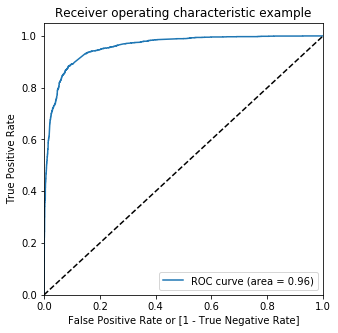

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

###  Finding Optimal Cutoff Point

In [129]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.153909,5123,0,1,1,0,0,0,0,0,0,0,0
1,0,0.000745,6322,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000641,3644,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001002,3011,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000299,8140,0,1,0,0,0,0,0,0,0,0,0


In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.777815  0.975144  0.657852
0.2   0.2  0.849136  0.951620  0.786832
0.3   0.3  0.882698  0.930315  0.853751
0.4   0.4  0.901158  0.869951  0.920130
0.5   0.5  0.900990  0.845983  0.934431
0.6   0.6  0.894445  0.809143  0.946303
0.7   0.7  0.876657  0.740790  0.959255
0.8   0.8  0.863064  0.673324  0.978413
0.9   0.9  0.817419  0.537062  0.987858


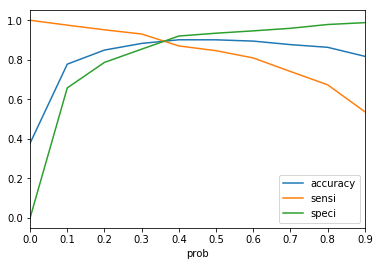

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head(10)

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.153909,5123,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.000745,6322,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000641,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001002,3011,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000299,8140,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.943363,1339,1,1,1,1,1,1,1,1,1,1,1,1
6,1,0.789908,211,1,1,1,1,1,1,1,1,1,0,0,1
7,1,0.774545,661,1,1,1,1,1,1,1,1,1,0,0,1
8,0,0.153909,2120,0,1,1,0,0,0,0,0,0,0,0,0
9,1,0.999161,475,1,1,1,1,1,1,1,1,1,1,1,1


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8983050847457628

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3490,  216],
       [ 390, 1863]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8268974700399467

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.9417161359956827

In [138]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05828386400431732


In [139]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8961038961038961


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8994845360824743


## Precision And Recall

In [142]:
#Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8961038961038961

In [143]:
#Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8268974700399467

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

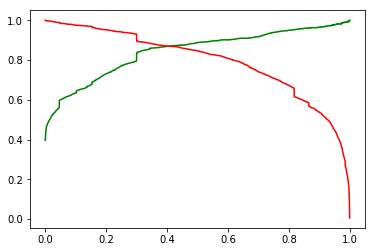

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [147]:
X_test_copy = X_test.copy()

In [148]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Country_Hong Kong,How did you hear about X Education_Email,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Do Not Email,Total Time Spent on Website
7358,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.175247
8398,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.613513
3472,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.578193
8673,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.709359
8053,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1.535867


In [149]:
X_test_sm = sm.add_constant(X_test)

In [150]:
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

7358    0.001141
8398    0.065326
3472    0.232905
8673    0.993556
8053    0.965344
6385    0.004550
5396    0.002446
7152    0.207791
7013    0.997827
7903    0.321335
dtype: float64

In [153]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()


,0
7358,0.001141
8398,0.065326
3472,0.232905
8673,0.993556
8053,0.965344


In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [155]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,Converted,LeadID,0
0,0,7358,0.001141
1,0,8398,0.065326
2,0,3472,0.232905
3,1,8673,0.993556
4,1,8053,0.965344


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [160]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conv_Prob'], axis=1)

In [161]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conv_Prob
0,7358,0,0.001141
1,8398,0,0.065326
2,3472,0,0.232905
3,8673,1,0.993556
4,8053,1,0.965344


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [163]:
y_pred_final.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7358,0,0.001141,0
1,8398,0,0.065326,0
2,3472,0,0.232905,0
3,8673,1,0.993556,1
4,8053,1,0.965344,1


In [164]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8931088488645262

In [165]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1468,  133],
       [ 140,  813]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8530954879328436

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9169269206745784

In [169]:
# Precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8594080338266384

## Calculate Lead Score on Train and Test Data

#### Calculate lead score on train data

In [173]:
# Inspecting final predicted train dataframe
y_train_pred_fnl = y_train_pred_final
y_train_pred_fnl.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.153909,5123,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.000745,6322,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000641,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001002,3011,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000299,8140,0,1,0,0,0,0,0,0,0,0,0,0


In [174]:
# Selecting only required columns
y_train_lead_score = y_train_pred_fnl[['LeadID','Converted','Conv_Prob','final_predicted']]
y_train_lead_score.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,5123,0,0.153909,0
1,6322,0,0.000745,0
2,3644,0,0.000641,0
3,3011,0,0.001002,0
4,8140,0,0.000299,0


In [175]:
# Calculate lead score
y_train_lead_score['Lead Score'] = y_train_lead_score['Conv_Prob'] * 100
y_train_lead_score.head()

,LeadID,Converted,Conv_Prob,final_predicted,Lead Score
0,5123,0,0.153909,0,15.390947
1,6322,0,0.000745,0,0.074510
2,3644,0,0.000641,0,0.064127
3,3011,0,0.001002,0,0.100186
4,8140,0,0.000299,0,0.029881


### Calculate lead score on test data

In [176]:
# Inspecting final predicted test dataframe
y_test_pred_fnl = y_pred_final
y_test_pred_fnl.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7358,0,0.001141,0
1,8398,0,0.065326,0
2,3472,0,0.232905,0
3,8673,1,0.993556,1
4,8053,1,0.965344,1


In [177]:
y_test_lead_score = y_test_pred_fnl

# Calculate lead score
y_test_lead_score['Lead Score'] = y_test_lead_score['Conv_Prob'] * 100
y_test_lead_score.head()

,LeadID,Converted,Conv_Prob,final_predicted,Lead Score
0,7358,0,0.001141,0,0.114149
1,8398,0,0.065326,0,6.532609
2,3472,0,0.232905,0,23.290534
3,8673,1,0.993556,1,99.355577
4,8053,1,0.965344,1,96.534357


In [178]:
y_test_lead_score = y_test_pred_fnl

# Calculate lead score
y_test_lead_score['Lead Score'] = y_test_lead_score['Conv_Prob'] * 100
y_test_lead_score.head()

,LeadID,Converted,Conv_Prob,final_predicted,Lead Score
0,7358,0,0.001141,0,0.114149
1,8398,0,0.065326,0,6.532609
2,3472,0,0.232905,0,23.290534
3,8673,1,0.993556,1,99.355577
4,8053,1,0.965344,1,96.534357


### Concat test and train data to get lead scores for the complete dataset

In [179]:
print(y_train_lead_score.shape)
print(y_test_lead_score.shape)

(5959, 5)
(2554, 5)


In [180]:
lead_score_final = pd.concat([y_train_lead_score,y_test_lead_score],axis=0,join='outer')
lead_score_final.shape

(8513, 5)

In [181]:
lead_score_final

,LeadID,Converted,Conv_Prob,final_predicted,Lead Score
0,5123,0,0.153909,0,15.390947
1,6322,0,0.000745,0,0.074510
2,3644,0,0.000641,0,0.064127
3,3011,0,0.001002,0,0.100186
4,8140,0,0.000299,0,0.029881
5,1339,1,0.943363,1,94.336327
6,211,1,0.789908,1,78.990769
7,661,1,0.774545,1,77.454509
8,2120,0,0.153909,0,15.390947
9,475,1,0.999161,1,99.916068


### Model was good with a Accuracy of 0.900990099009901 and 0.8931088488645262 for train and test data respectively.